In [3]:
import pandas as pd
import numpy as np
import os

dataset_A_320k = pd.read_csv('./Cleaned Dataset/Dataset_A.csv')
dataset_B_70k  = pd.read_csv('./Cleaned Dataset/Dataset_B.csv')
dataset_C_1500 = pd.read_csv('./Cleaned Dataset/Dataset_C.csv')


In [6]:
#Mix dataset_B randomly
from random import shuffle
dataset_B_shuffled = dataset_B_70k.sample(frac=1, random_state=42).reset_index(drop=True)

dataset_B_shuffled.head()


,id,Age,Gender,Systolic Blood Pressure,Diastolic Blood Pressure,Cholesterol Level,Glucose Level,Smoking Status,Alcohol Intake,Physical Activity,Cardiovascular Disease,BMI
0,50298,63,1,120,70,2,1,0,0,1,1,29.6
1,31179,45,1,170,110,2,1,0,0,1,1,35.8
2,41076,63,2,120,80,2,2,0,0,1,1,29.1
3,93648,59,1,120,80,1,1,0,0,1,1,23.9
4,86366,49,1,120,80,1,1,0,0,1,0,26.3


In [9]:
#Split dataset_B_shuffled into 3 parts : 40%, 40%, 20%
start = 0
end_40 = int(len(dataset_B_shuffled) * 0.4)
end_80 = int(len(dataset_B_shuffled) * 0.8)

datasetB_Model_A = dataset_B_shuffled.iloc[start:end_40].reset_index(drop=True)
datasetB_Model_B = dataset_B_shuffled.iloc[end_40:end_80].reset_index(drop=True)
datasetB_TrainSet = dataset_B_shuffled.iloc[end_80:].reset_index(drop=True)



In [10]:
#Sort columns alphabetically
dataset_A_320k = dataset_A_320k[sorted(dataset_A_320k.columns)]
dataset_B_Model_A = datasetB_Model_A[sorted(datasetB_Model_A.columns)]
dataset_B_Model_B = datasetB_Model_B[sorted(datasetB_Model_B.columns)]
dataset_B_TrainSet = datasetB_TrainSet[sorted(datasetB_TrainSet.columns)]
dataset_C_1500 = dataset_C_1500[sorted(dataset_C_1500.columns)]

## Create LifeStyle Dataset

In [12]:
#Drop columns no longer needed from dataset_B_Model_A
#Merge with column A

#print(dataset_A_320k.columns)
#print("--------------------------------------")
#print(dataset_B_Model_A.columns)

dataset_A_30k = dataset_A_320k.sample(n=30000, random_state=42).reset_index(drop=True)

#Drop columns : Cholesterol Level, Diastorlic Blood Pressure, Systolic Blood Pressure,Glucose Level,id from dataset_B_model_A
columns_to_drop = ['Cholesterol Level', 'Diastolic Blood Pressure', 'Systolic Blood Pressure', 'Glucose Level', 'id']
dataset_B_Model_A = dataset_B_Model_A.drop(columns=columns_to_drop)

#Merge dataset_A_30k with dataset_B_Model_A
lifestyle_dataset = pd.concat([dataset_A_30k,dataset_B_Model_A], #List of DataFrames to concatenate
                              axis=0,                            # Concatenate along rows
                              ignore_index=True,                 # Reset index after concatenation
                              sort=False)                        # keep original column order

#Shuffle the lifestyle dataset
lifestyle_dataset = lifestyle_dataset.sample(frac=1,random_state=42).reset_index(drop=True)
#Output the lifestyle dataset to a CSV file
lifestyle_dataset.to_csv('lifestyle_dataset.csv', index=False)


## Create HealthFactors Dataset

In [13]:

B_columns_to_drop = ['Smoking Status', 'Physical Activity', 'Alcohol Intake','id']
C_columns_to_drop = ['Smoking Status', 'Physical Activity', 'Alcohol Intake']

#Drop columns no longer needed from dataset_B_Model_B and dataset_C_1500
dataset_B_Model_B = dataset_B_Model_B.drop(columns=B_columns_to_drop)
dataset_C_1500 = dataset_C_1500.drop(columns=C_columns_to_drop)

#Merge dataset_B_Model_B with dataset_C_1500
#Since dataset_B_Model_B has more data than dataset_C_1500, we will merge 8500 samples from dataset_B_Model_B with dataset_C_1500
dataset_B_Model_B_8500 = dataset_B_Model_B.sample(n=8500, random_state=50).reset_index(drop=True)
health_factors_dataset = pd.concat([dataset_B_Model_B_8500, dataset_C_1500], 
                                    axis=0, 
                                    ignore_index=True, 
                                    sort=False)

#Shuffle the health factors dataset
health_factors_dataset = health_factors_dataset.sample(frac=1, random_state=50).reset_index(drop=True)
#Output the health factors dataset to a CSV file
health_factors_dataset.to_csv('healthFactors_dataset.csv', index=False)



In [19]:
# Healt Factor dataset with indicator
dataset_C_1500['Is Minority'] = 1
dataset_B_Model_B['Is Minority'] = 0 

#Merge dataset_B_Model_B with dataset_C_1500
health_factors_dataset = pd.concat([dataset_B_Model_B, dataset_C_1500], 
                                    axis=0, 
                                    ignore_index=True, 
                                    sort=False)
#Shuffle the health factors dataset
health_factors_dataset = health_factors_dataset.sample(frac=1, random_state=50).reset_index(drop=True)
#Output the health factors dataset to a CSV file
health_factors_dataset.to_csv('healthFactors_dataset_with_indicator.csv', index=False)



## Data distributions

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_all_distributions(df: pd.DataFrame, color='blue'):
    """
    Plot distributions for all columns in the DataFrame.

    Numeric columns: histogram with KDE.
    Categorical columns: count plot.

    Args:
        df (pd.DataFrame): Input data.
        color (str): Color for the plots (default: 'blue').
    """
    num_cols = df.select_dtypes(include=['number']).columns
    cat_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns

    num_plots = len(num_cols) + len(cat_cols)
    ncols = 3
    nrows = (num_plots + ncols - 1) // ncols

    plt.figure(figsize=(5 * ncols, 4 * nrows))

    # Plot numerical columns
    for idx, col in enumerate(num_cols, 1):
        plt.subplot(nrows, ncols, idx)
        sns.histplot(df[col].dropna(), color=color, kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)

    # Plot categorical columns
    for idx_cat, col in enumerate(cat_cols, len(num_cols) + 1):
        plt.subplot(nrows, ncols, idx_cat)
        sns.countplot(x=df[col], color=color, order=df[col].value_counts().index)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()



# Comparing dataset_B_Model_A and lifestyle_dataset

In [8]:
dataset_B_70k['Age'].unique()

array([50, 55, 51, 48, 47, 60, 61, 54, 40, 39, 45, 58, 59, 63, 64, 53, 49,
       57, 56, 46, 43, 62, 52, 42, 44, 41, 29, 30], dtype=int64)

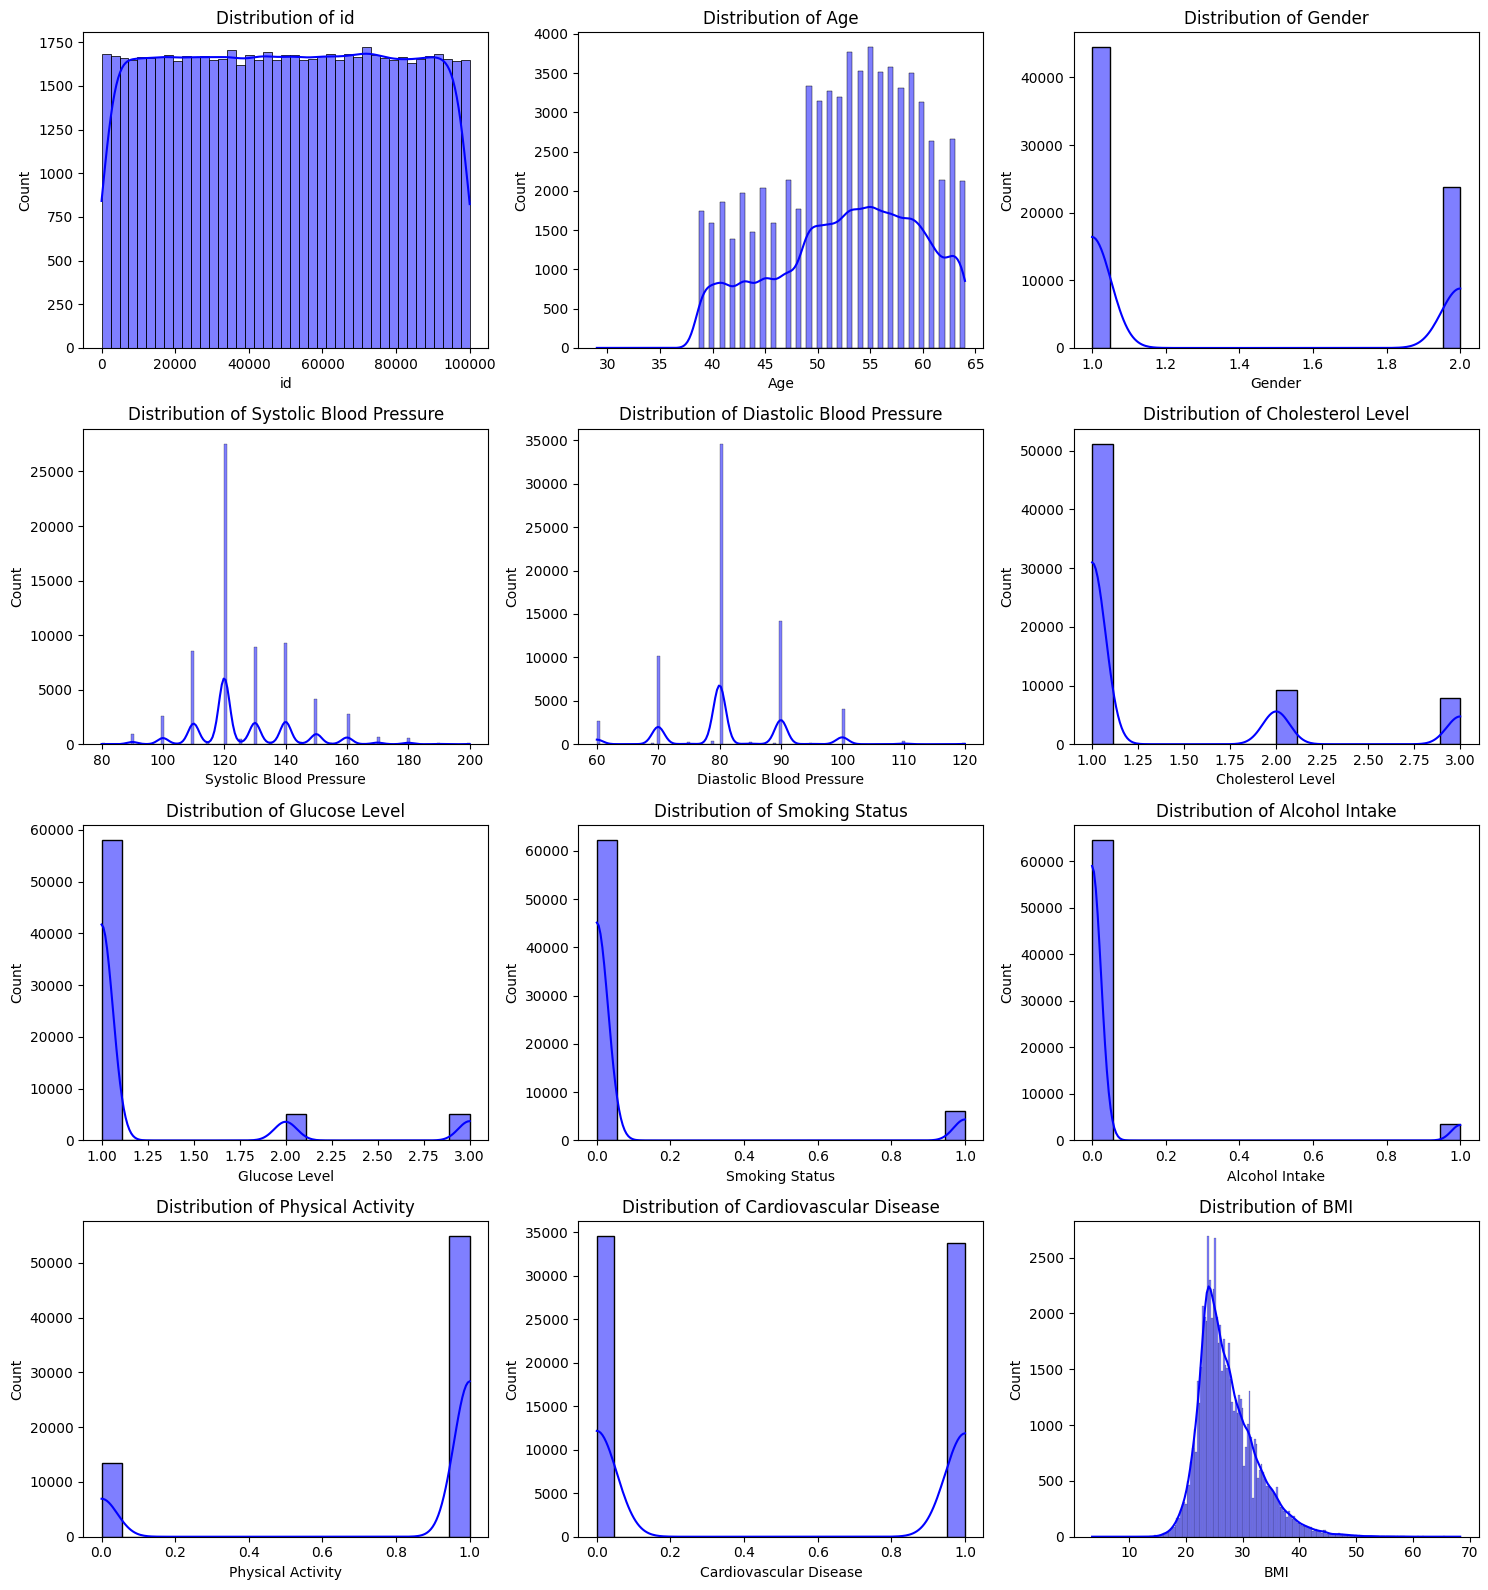

In [7]:
plot_all_distributions(dataset_B_70k)

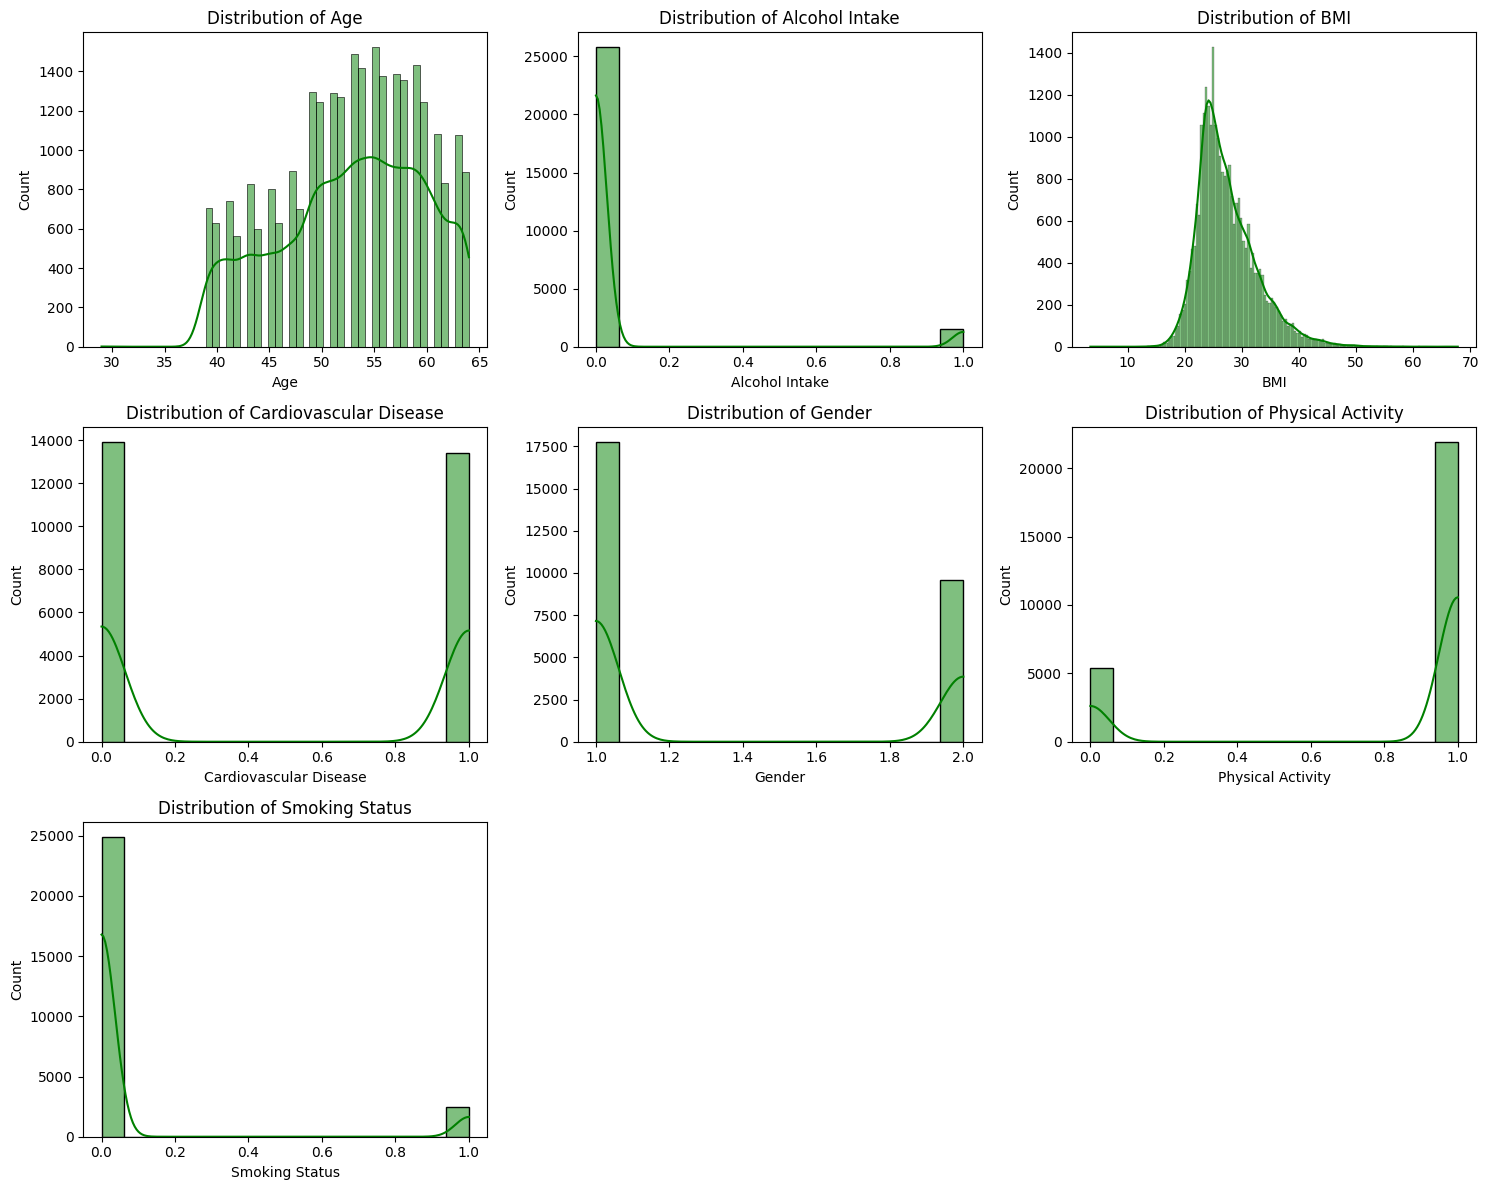

In [15]:

plot_all_distributions(dataset_B_Model_A, color='green')

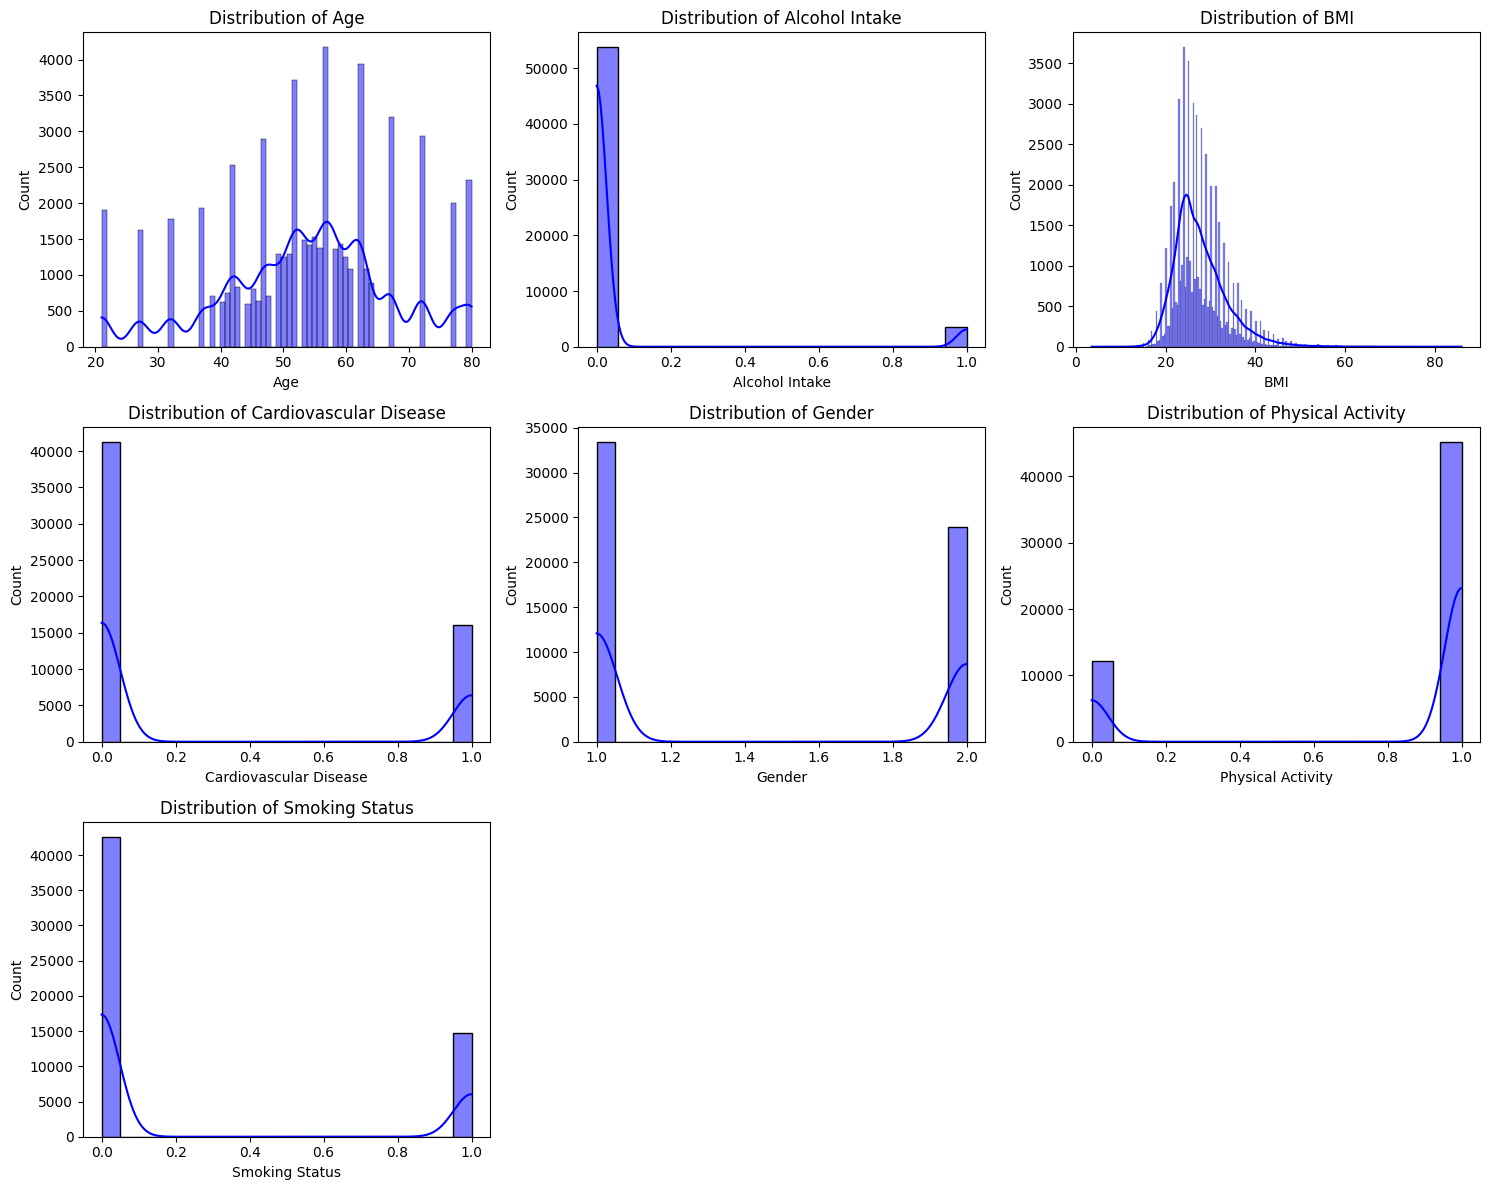

In [16]:
plot_all_distributions(lifestyle_dataset, color='blue')

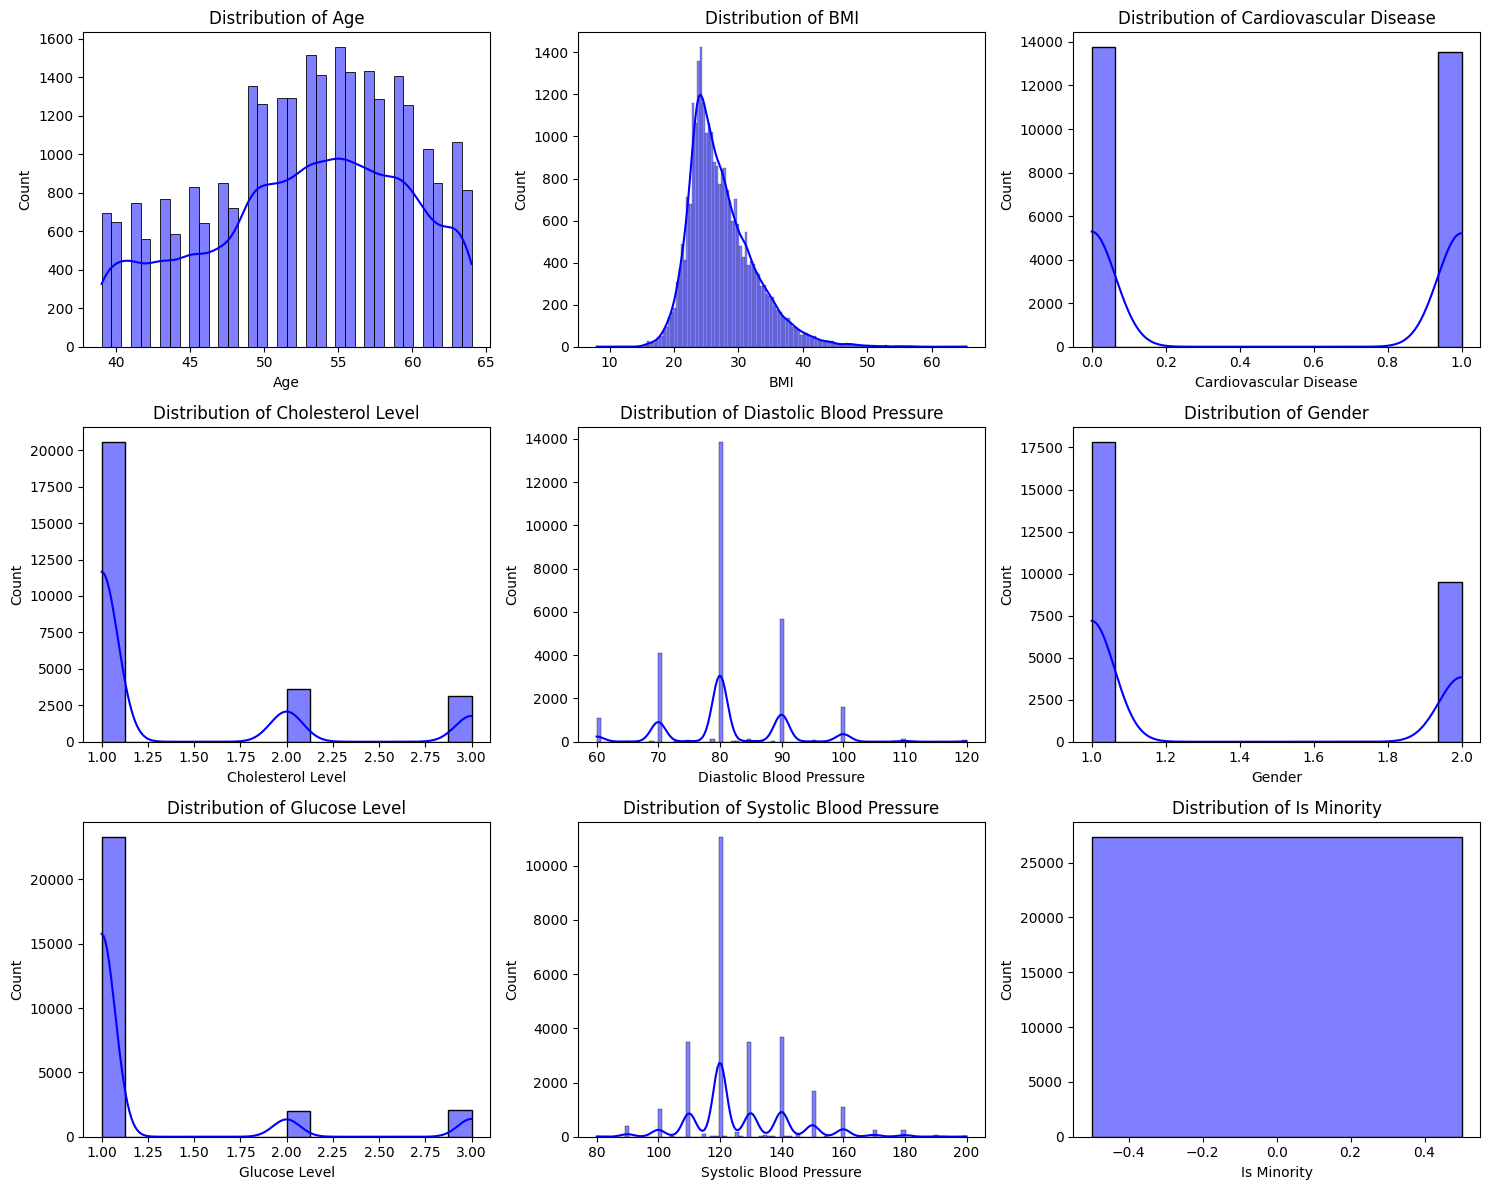

In [21]:
plot_all_distributions(dataset_B_Model_B, color='blue')


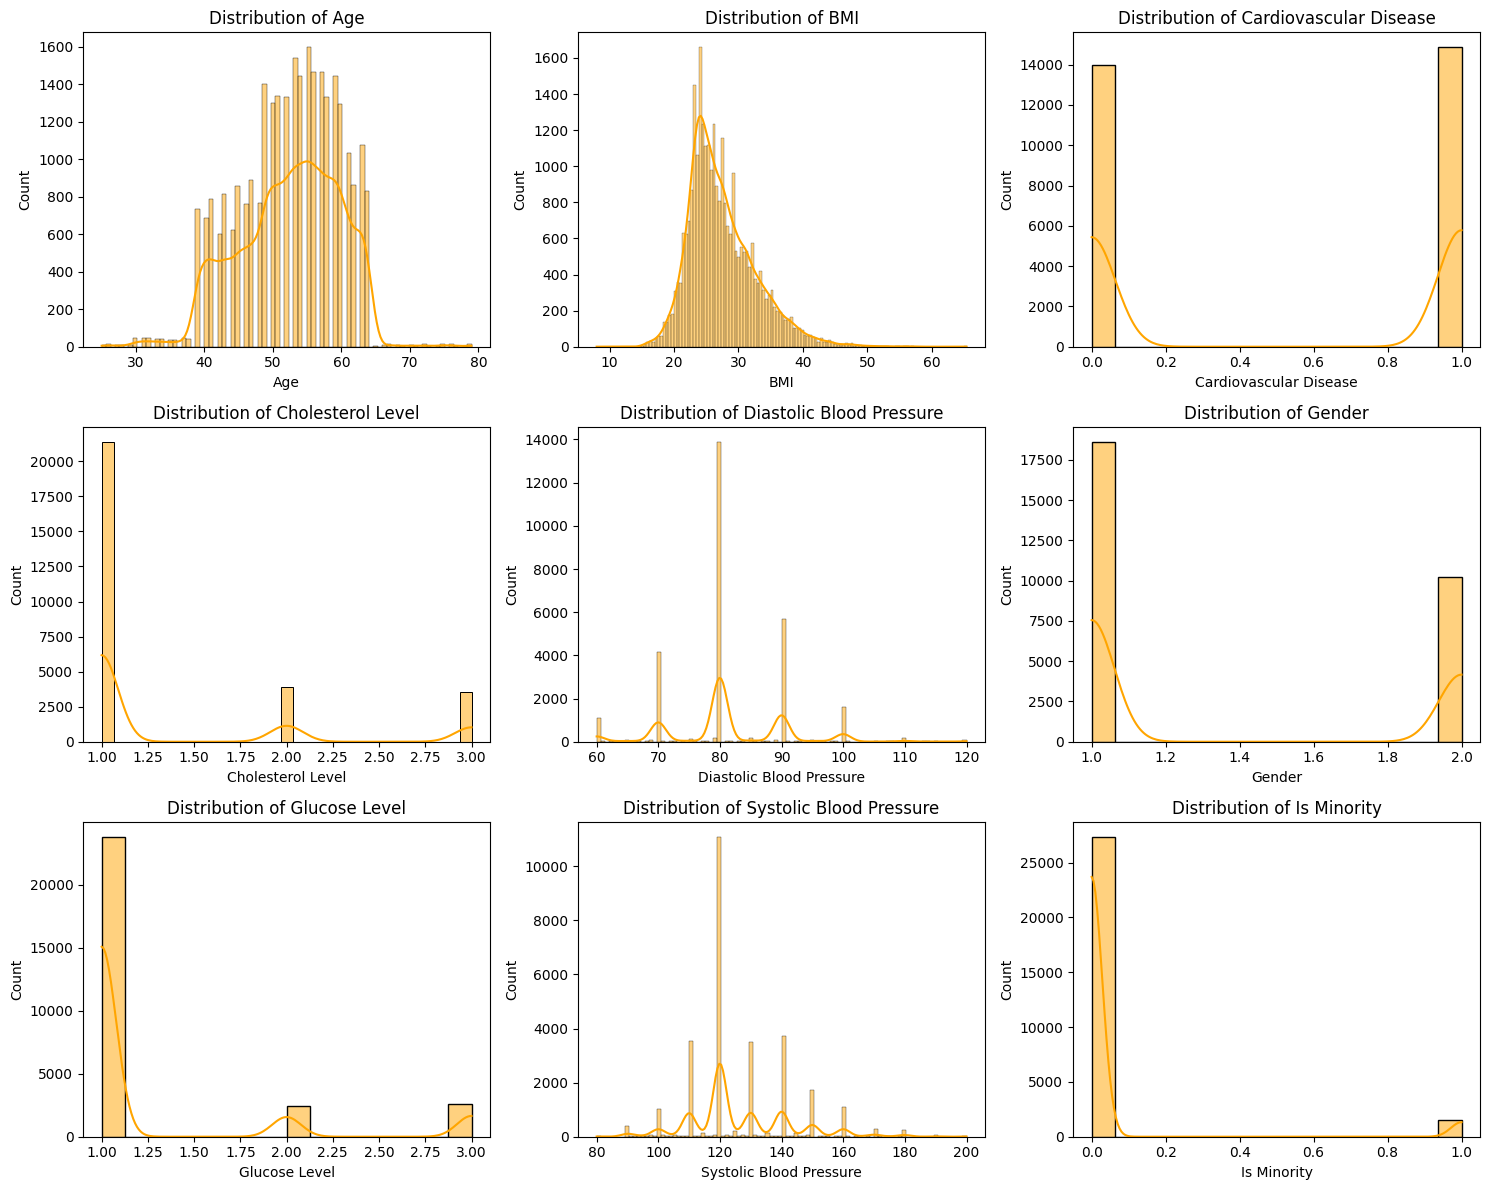

In [20]:
plot_all_distributions(health_factors_dataset, color='orange')

In [22]:
dataset_B_TrainSet.to_csv('Training_For_Meta_Model.csv', index=False)